# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
# plotly
%matplotlib notebook

# naložimo razpredelnico, s katero bomo delali
pot_do_podatkov = '..\\..\\02-zajem-podatkov\\predavanja\\obdelani-podatki\\filmi.csv'

filmi = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

Poberite stolpec ocen.

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [ ]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

Dodajte zaokrožene vrednosti v podatke.

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [6]:
def je_kratek_naslov(naslov, max_besed=2):
    return len(naslov.split()) <= max_besed

dobra_ocena = filmi['ocena'] > 8
kratki_naslovi = filmi['naslov'].apply(je_kratek_naslov)

filmi[dobra_ocena & kratki_naslovi]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car..."
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ..."
14,15864,Zlata mrzlica,95,1925,8.2,NaN,91091,5450000.0,NaN,A prospector goes to the Klondike in search of...
15,15881,Greed,140,1924,8.1,NaN,8374,161800.0,NaN,The sudden fortune won from a lottery fans suc...
...,...,...,...,...,...,...,...,...,...,...
9973,8239946,Tumbbad,104,2018,8.2,NaN,15677,NaN,NaN,A mythological story about a goddess who creat...
9976,8267604,Capharnaüm,126,2018,8.4,75.0,27308,1661096.0,R,While serving a five-year sentence for a viole...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...


### Histogrami

Združite filme po ocenah in jih preštejte.

In [ ]:

po_ocenah = filmi.groupby('zaokrozena ocena').size()
po_ocenah

Naredite stolpični diagram teh podatkov.

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

### Izris povprečne dolžine filma glede na leto

In [9]:
filmi_po_letu = filmi.groupby('leto')
povprecje_po_letu = filmi_po_letu.mean()
povprecna_dolzina = povprecje_po_letu('dolzina')
povprecna_dolzin.plot()

TypeError: 'DataFrame' object is not callable

### Izris skupnega zasluzka za posamezno leto

<IPython.core.display.Javascript object>


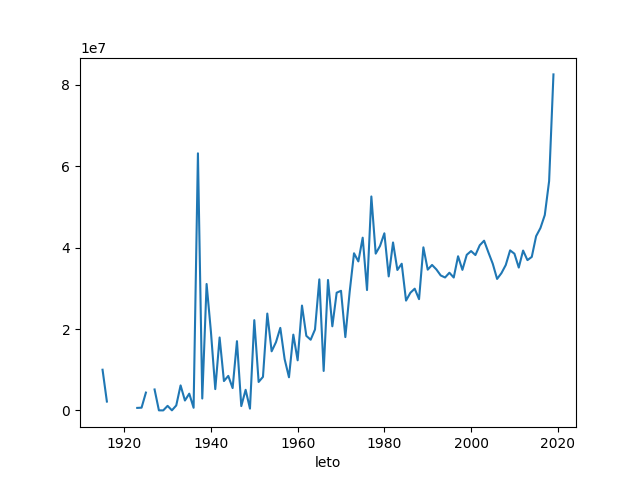

<AxesSubplot:xlabel='leto'>

In [10]:
filmi_po_letu.mean()['zasluzek'].plot()